In [18]:
import time
from Arm_Lib import Arm_Device
Arm  = Arm_Device()

In [19]:
from roboticstoolbox import *
from spatialmath import *
from math import pi
import numpy as np

%matplotlib widget

In [20]:
DFbot = DHRobot(
    [
        RevoluteDH(d=0.04145,alpha=np.pi/2,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(alpha=-np.pi/2,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(d=0.11,qlim=np.array([-np.pi,3/2*np.pi]))
    ],
    name = "DFbot",
)
print(DFbot)

DHRobot: DFbot, 5 joints (RRRRR), dynamics, standard DH parameters
┌─────┬─────────┬──────────┬────────┬─────────┬────────┐
│ θⱼ  │   dⱼ    │    aⱼ    │   ⍺ⱼ   │   q⁻    │   q⁺   │
├─────┼─────────┼──────────┼────────┼─────────┼────────┤
│  q1 │ 0.04145 │        0 │  90.0° │ -180.0° │ 180.0° │
│  q2 │       0 │ -0.08285 │   0.0° │ -180.0° │ 180.0° │
│  q3 │       0 │ -0.08285 │   0.0° │ -180.0° │ 180.0° │
│  q4 │       0 │        0 │ -90.0° │ -180.0° │ 180.0° │
│  q5 │    0.11 │        0 │   0.0° │ -180.0° │ 270.0° │
└─────┴─────────┴──────────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘



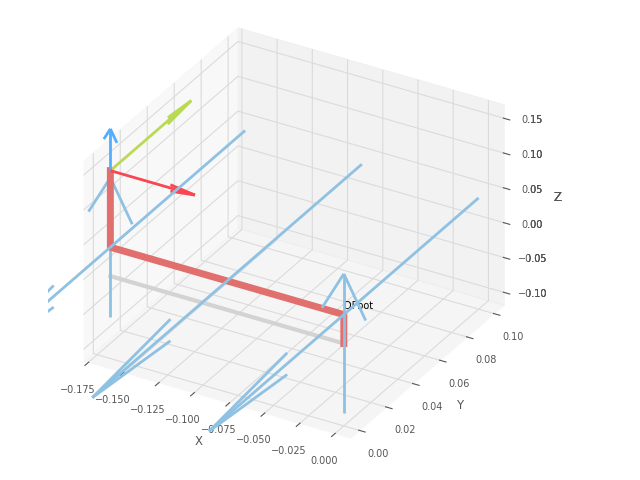

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [21]:
DFbot.plot([0,0,0,0,0])

In [22]:
def convert_to_jointAngle(radian):
    
    deg = [x/np.pi*180 for x in radian] #convert radian state to degree

    j1 = +deg[0] + 90
    j2 = -deg[1]
    j3 = -deg[2] + 90
    j4 = -deg[3] + 180
    j5 = +deg[4] + 90
    return [j1,j2,j3,j4,j5]

In [23]:
initial_state_joints = convert_to_jointAngle([0,0,0,0,0])

In [24]:
Arm.Arm_serial_servo_write6(initial_state_joints[0],initial_state_joints[1],initial_state_joints[2],initial_state_joints[3],initial_state_joints[4],90,3000)

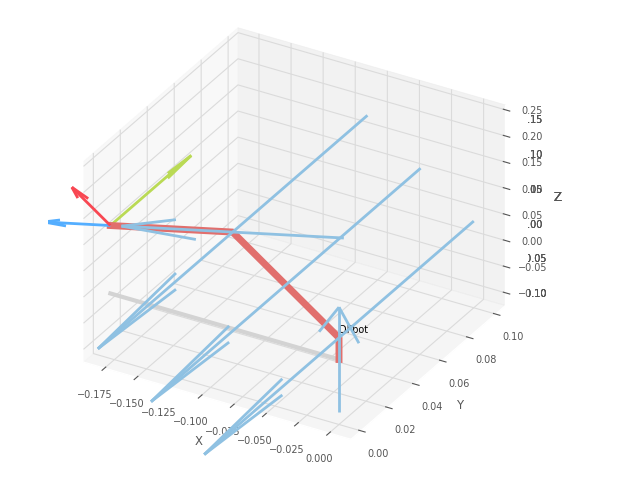

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [25]:
state1 = [0, -np.pi/3, 0, np.pi, 0]
state1_joints = convert_to_jointAngle(state1)
DFbot.plot(state1)

In [26]:
Arm.Arm_serial_servo_write6(state1_joints[0],state1_joints[1],state1_joints[2],state1_joints[3],state1_joints[4],90,3000)

In [27]:
T1 = DFbot.fkine(state1)
T1

  -0.5       0        -0.866    -0.1781    
   0         1         0         0         
   0.866     0        -0.5       0.13      
   0         0         0         1         


In [32]:
T2 = np.array(T1)
T2[0,-1] = -0.2
T2[2,-1] = 0
T2

array([[-5.00000000e-01, -5.30287619e-17, -8.66025404e-01,
        -2.00000000e-01],
       [ 5.30287619e-17,  1.00000000e+00, -9.18485099e-17,
        -1.31647024e-18],
       [ 8.66025404e-01, -9.18485099e-17, -5.00000000e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [33]:
T2_sol = DFbot.ikine_LM(T2,q0=[0,0,0,0,0],ilimit=100,slimit=100,joint_limits=True)

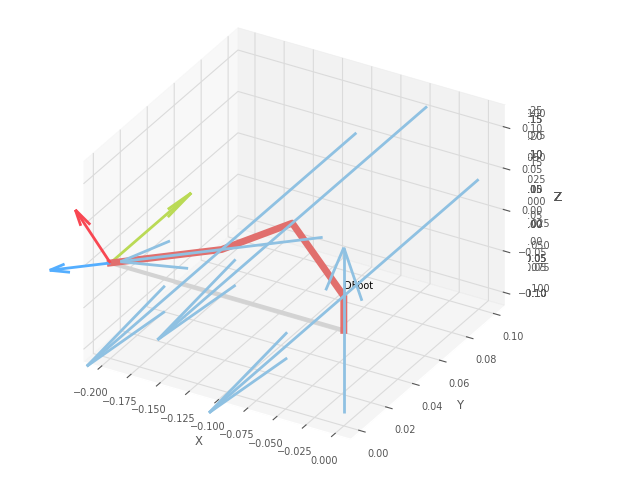

IKSolution(q=array([ 0.        , -1.00839123,  1.75946724,  1.3433191 ,  0.        ]), success=True, iterations=8, searches=1, residual=1.4465544085985084e-08, reason='Success')

In [34]:
DFbot.plot(T2_sol.q)
state2 = T2_sol.q
T2_sol

In [35]:
state2_joint = convert_to_jointAngle(state2)
Arm.Arm_serial_servo_write6(state2_joint[0],state2_joint[1],state2_joint[2],state2_joint[3],state2_joint[4],90,3000)

In [76]:
state2_joint

[90.0, 35.14138417427099, -8.626788047422977, 123.4854041760718, 90.0]